This notebook is to just compare RSR and RSR++. Just the last step where the multiplication is happening for each block.

In [14]:
import sys
sys.path.insert(0, '..')

from multipliers import (
    NaiveMultiplier, 
    RSRBinaryMultiplier, 
    RSRTernaryMultiplier,
    RSRPlusPlusBinaryMultiplier
)

import random
import time
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
from tqdm import tqdm

import numpy as np
import pandas as pd
import seaborn as sns

In [41]:
k = 12

def generate_binary_matrix(k):
        num_rows = 2 ** k
        binary_matrix = np.array([list(map(int, np.binary_repr(i, width=k))) for i in range(num_rows)])
        return binary_matrix

def faster_mult(segmented_sum, k):
        result = np.empty(k)
        for i in range(k, 0, -1):
            result[i - 1] = np.sum(segmented_sum[1::2])
            segmented_sum = segmented_sum[::2] + segmented_sum[1::2]
        return result

def naive(segmented_sum, bin_mat):
    return np.dot(segmented_sum, bin_mat)

faster_mult(np.array([1, 2, 3, 4, 5, 6, 7, 8]), 3), naive(np.array([1, 2, 3, 4, 5, 6, 7, 8]), generate_binary_matrix(3))

(array([26., 22., 20.]), array([26, 22, 20]))

In [42]:
ks = [12, 13, 14, 15, 16, 17, 18, 19, 20]

In [43]:
fast_times = []
naive_times = []
for i in range(1):
    for k in ks:
        bin_k = generate_binary_matrix(k)
        print(f"k: {k}")
        vector = np.random.randint(0, 100, 2**k)
        print("fast: ", end="")
        fast_time = %timeit -o faster_mult(vector, k)
        print("naive: ", end="")
        naive_time = %timeit -o naive(vector, bin_k)
        fast_times.append(fast_time.best)
        naive_times.append(naive_time.best)

k: 12
fast: 47.4 µs ± 328 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
naive: 28.6 µs ± 91.3 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
k: 13
fast: 55.5 µs ± 136 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
naive: 61.9 µs ± 165 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
k: 14
fast: 66.4 µs ± 265 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
naive: 456 µs ± 543 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
k: 15
fast: 84.7 µs ± 423 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
naive: 1.47 ms ± 299 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
k: 16
fast: 127 µs ± 226 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
naive: 3.11 ms ± 3.95 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
k: 17
fast: 237 µs ± 597 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
naive: 8.52 ms ± 11.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
k: 18
f

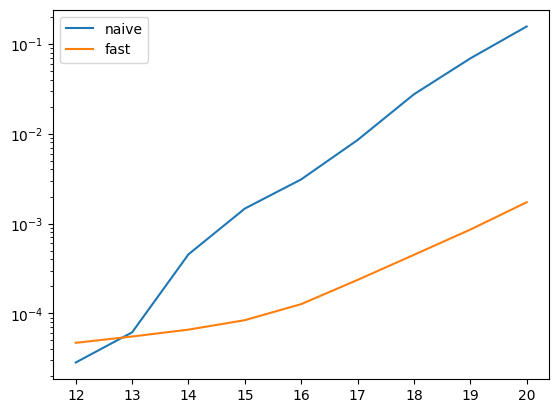

In [44]:
plt.plot(ks, naive_times, label="naive")
plt.plot(ks, fast_times, label="fast")
plt.yscale("log")
plt.legend()